## Load Data

### Subtask:
Load the dataset from the file 'merged_macro_financial_daily.cleaned.csv_2.csv' into a pandas DataFrame.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/merged_macro_financial_daily.cleaned.csv_2.csv')

# Display the first 5 rows
df.head()

,date,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,spread_10y_2y,...,TBCDN1YMID,FXUSDCAD,FXEURCAD,EURUSD,USDCAD_ret,DGS10,DFF,T10YIE,DTWEXBGS,CPIAUCSL
0,2018-01-01,2.26,0.57,1.68,1.73,1.86,1.94,2.04,2.22,0.36,...,1.53,1.2545,1.5052,1.199841,-0.003416,2.40,1.33,1.96,110.0783,248.859
1,2018-01-02,2.32,0.62,1.70,1.74,1.89,1.97,2.08,2.27,0.38,...,1.52,1.2517,1.5082,1.204921,-0.002232,2.46,1.42,2.00,109.6444,248.859
2,2018-01-03,2.29,0.58,1.68,1.72,1.86,1.95,2.05,2.24,0.37,...,1.52,1.2533,1.5067,1.202186,0.001278,2.44,1.42,1.98,109.6751,248.859
3,2018-01-04,2.32,0.58,1.70,1.74,1.89,1.97,2.08,2.27,0.38,...,1.52,1.2515,1.5106,1.207032,-0.001436,2.46,1.42,2.01,109.4779,248.859
4,2018-01-08,2.36,0.60,1.78,1.83,1.98,2.06,2.16,2.32,0.38,...,1.58,1.2422,1.4868,1.196909,0.001532,2.49,1.42,2.02,109.5678,248.859


## Check for Duplicate Rows

### Subtask:
Identify and count any duplicate rows present in the DataFrame.


In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


## Identify Column Data Types

### Subtask:
Display the data types for each column in the DataFrame.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1818 non-null   object 
 1   goc_long_benchmark   1818 non-null   float64
 2   goc_long_benchmark1  1818 non-null   float64
 3   goc_2y_benchmark     1818 non-null   float64
 4   goc_3y_benchmark     1818 non-null   float64
 5   goc_5y_benchmark     1818 non-null   float64
 6   goc_7y_benchmark     1818 non-null   float64
 7   goc_10y_benchmark    1818 non-null   float64
 8   goc_avg_over10y      1818 non-null   float64
 9   spread_10y_2y        1818 non-null   float64
 10  spread_10y_5y        1818 non-null   float64
 11  V39079               1818 non-null   float64
 12  AVGINTWO             1818 non-null   float64
 13  TBCDN30DMID          1818 non-null   float64
 14  TBCDN90DMID          1818 non-null   float64
 15  TBCDN180DMID         1818 non-null   f

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'date': 1818 unique values


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
date                   0.0
goc_long_benchmark     0.0
goc_long_benchmark1    0.0
goc_2y_benchmark       0.0
goc_3y_benchmark       0.0
goc_5y_benchmark       0.0
goc_7y_benchmark       0.0
goc_10y_benchmark      0.0
goc_avg_over10y        0.0
spread_10y_2y          0.0
spread_10y_5y          0.0
V39079                 0.0
AVGINTWO               0.0
TBCDN30DMID            0.0
TBCDN90DMID            0.0
TBCDN180DMID           0.0
TBCDN1YMID             0.0
FXUSDCAD               0.0
FXEURCAD               0.0
EURUSD                 0.0
USDCAD_ret             0.0
DGS10                  0.0
DFF                    0.0
T10YIE                 0.0
DTWEXBGS               0.0
CPIAUCSL               0.0
dtype: float64


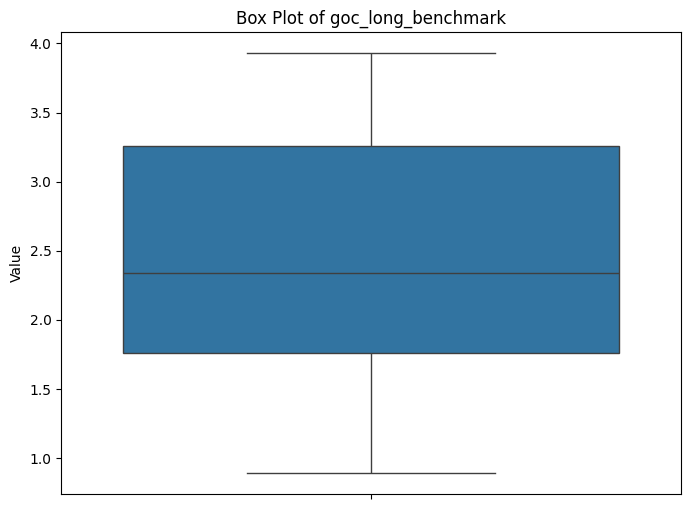

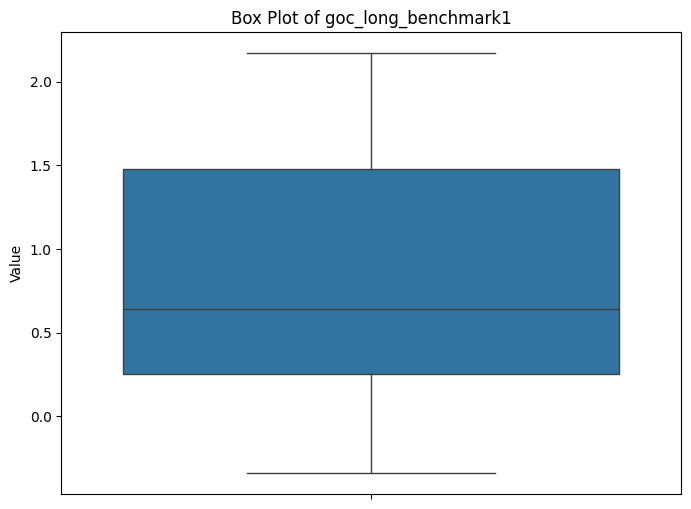

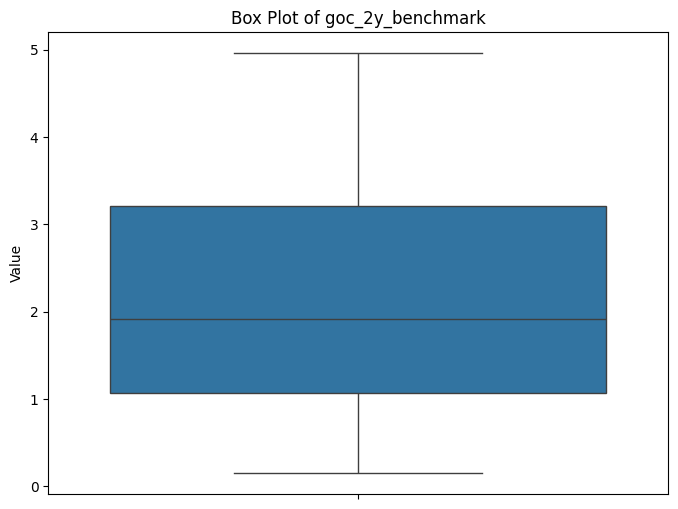

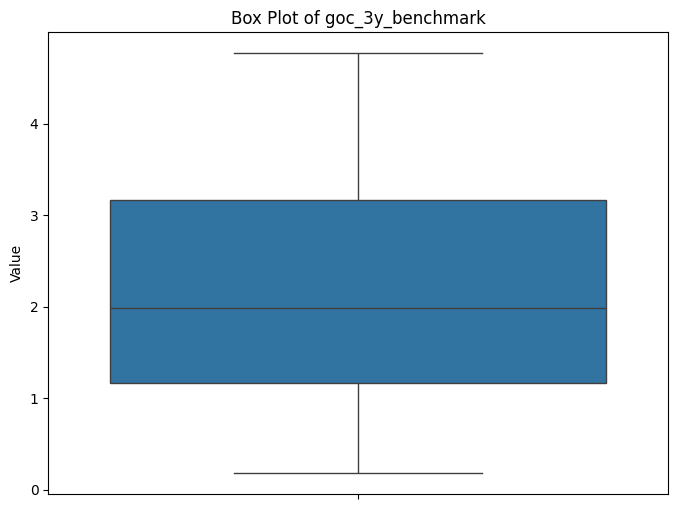

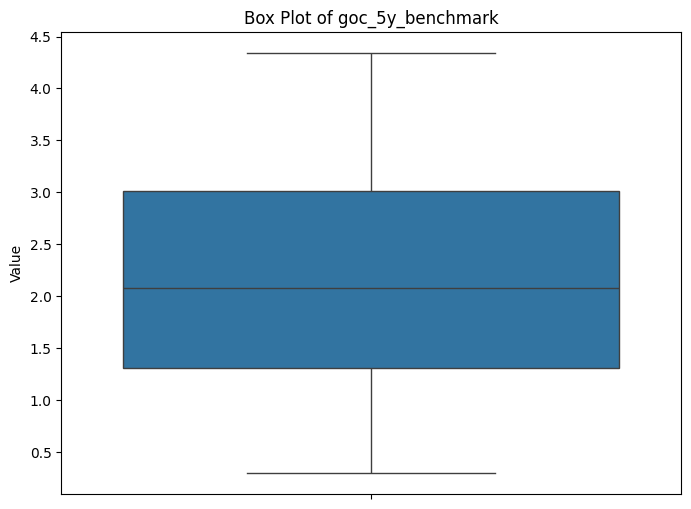

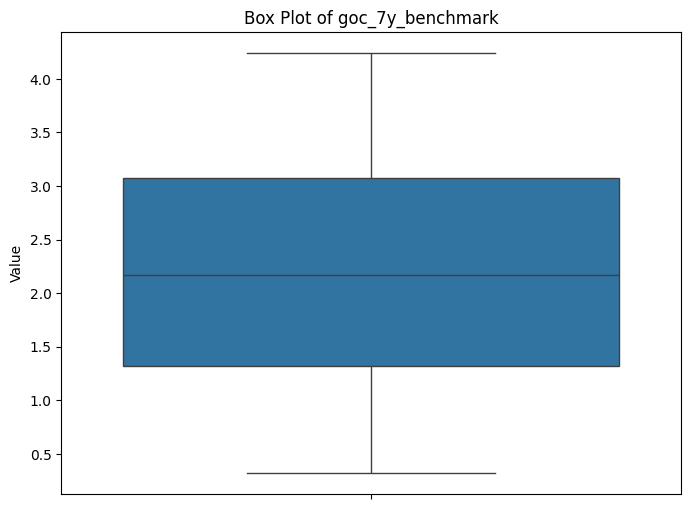

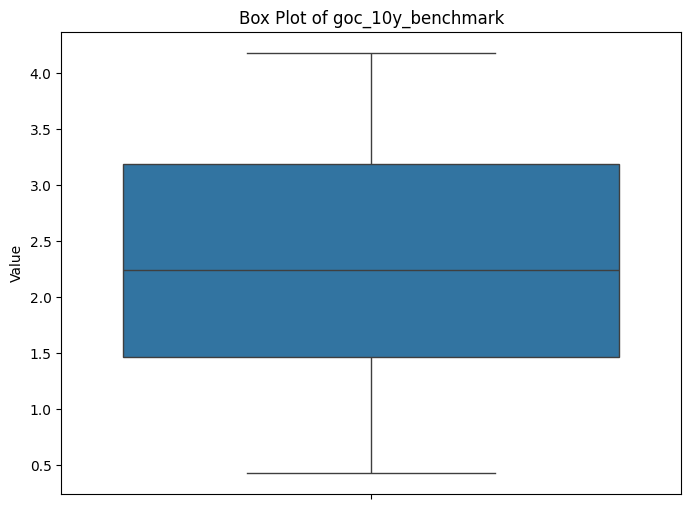

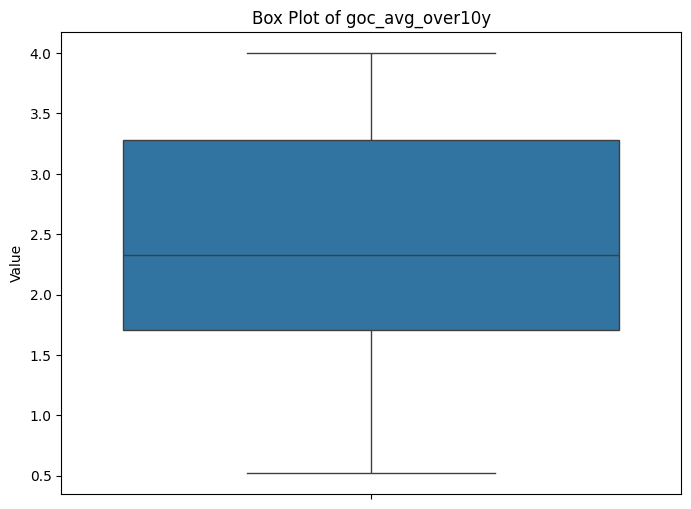

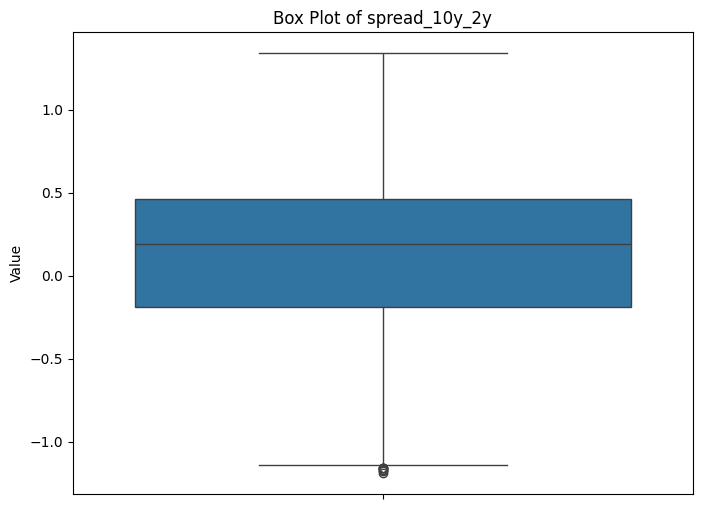

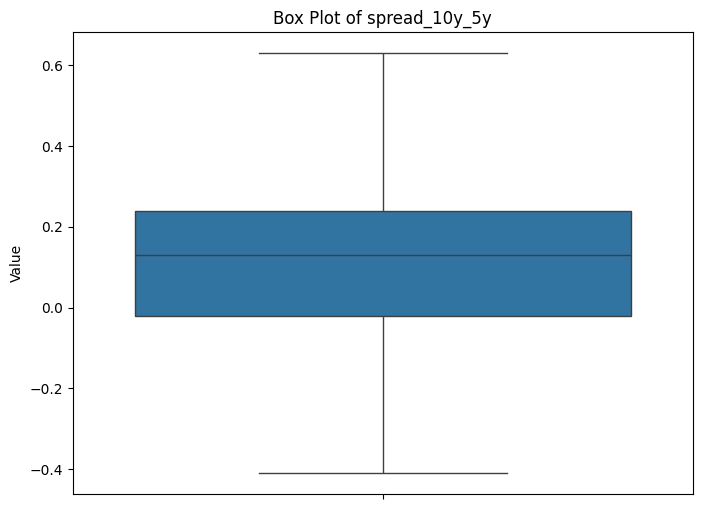

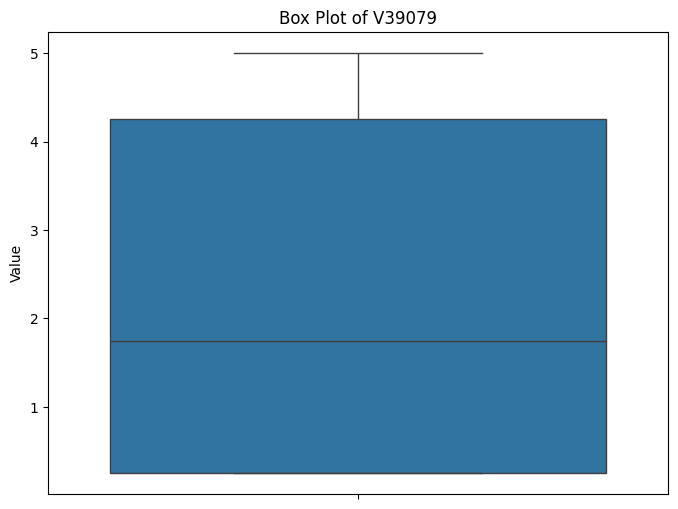

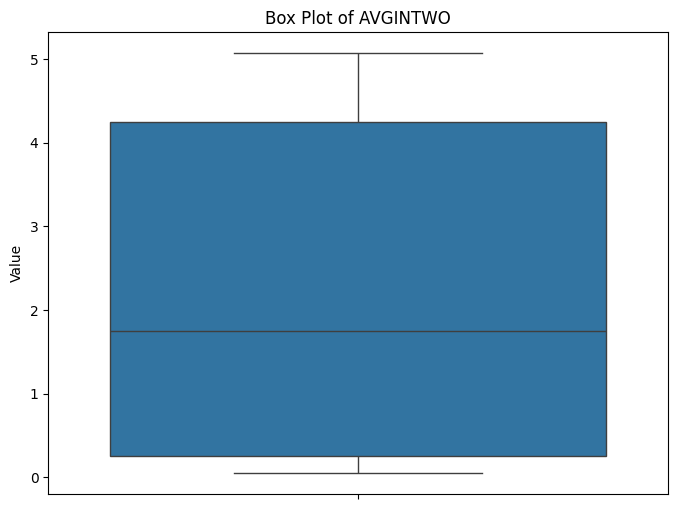

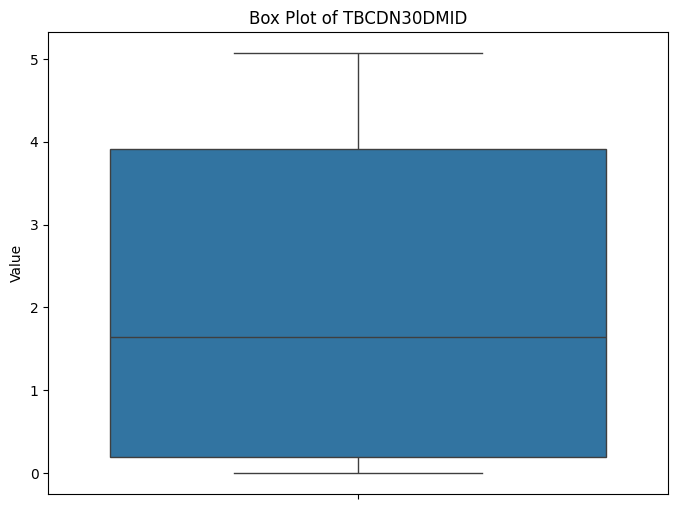

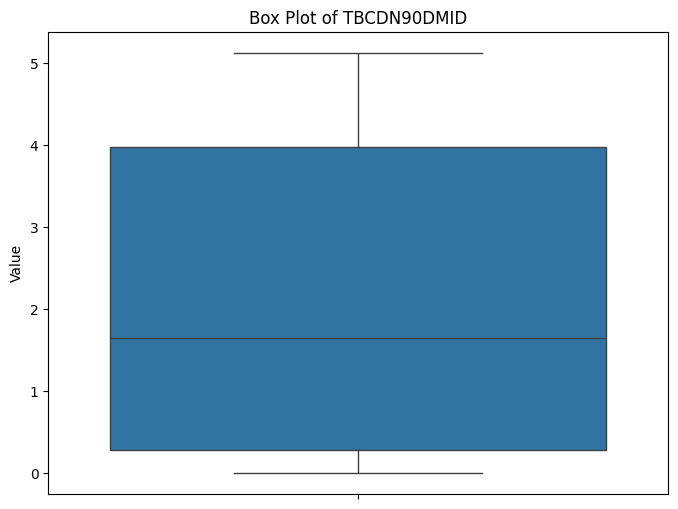

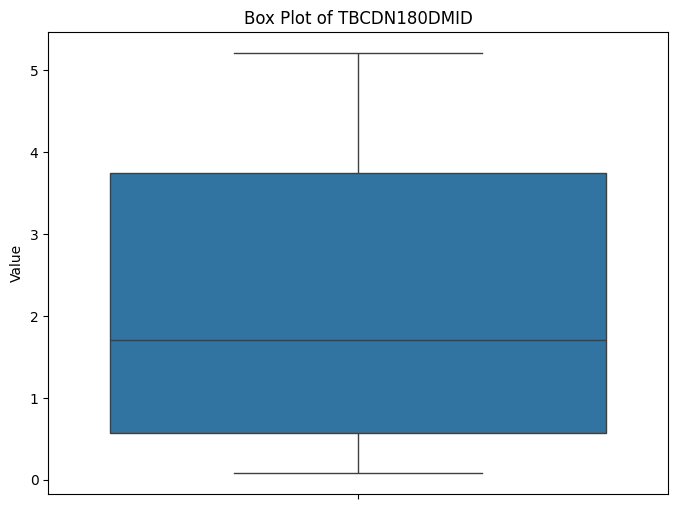

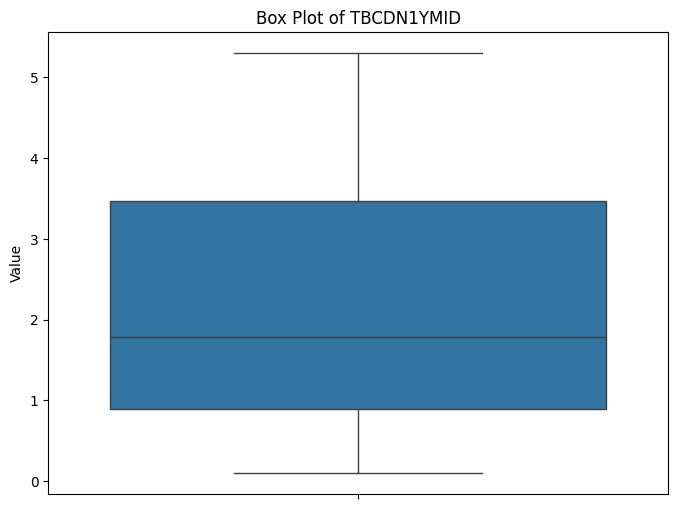

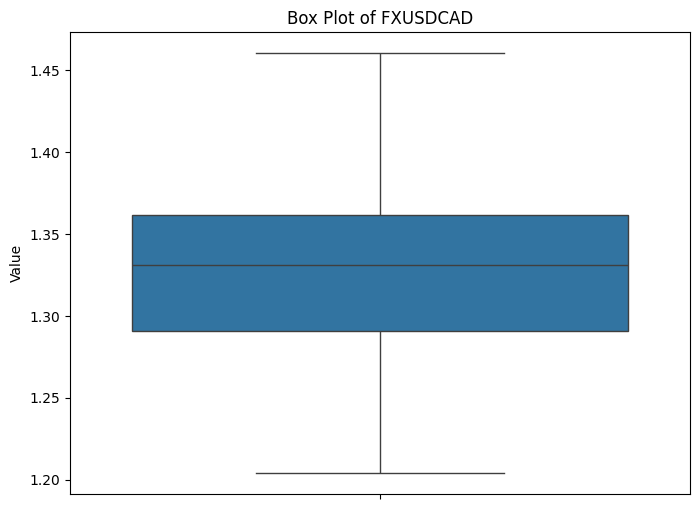

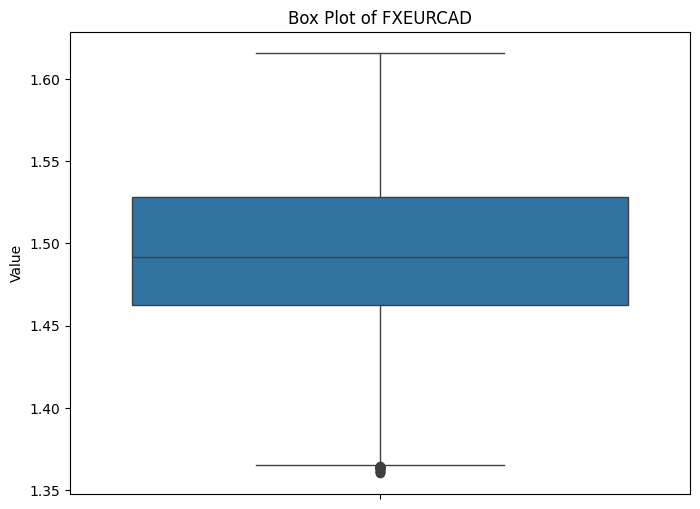

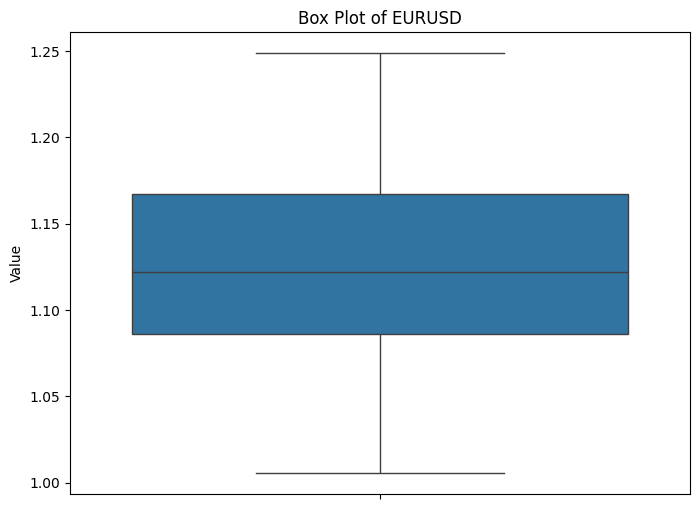

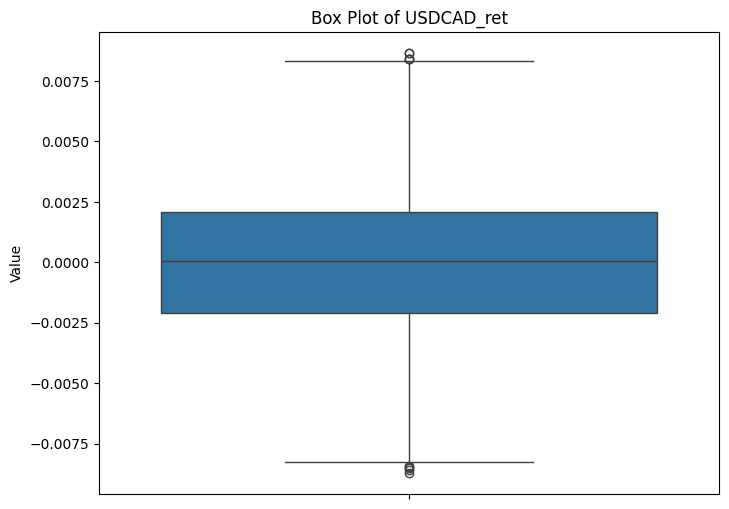

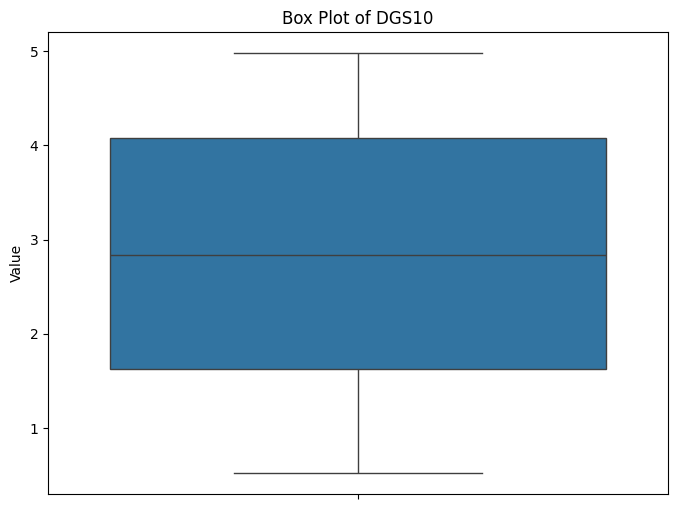

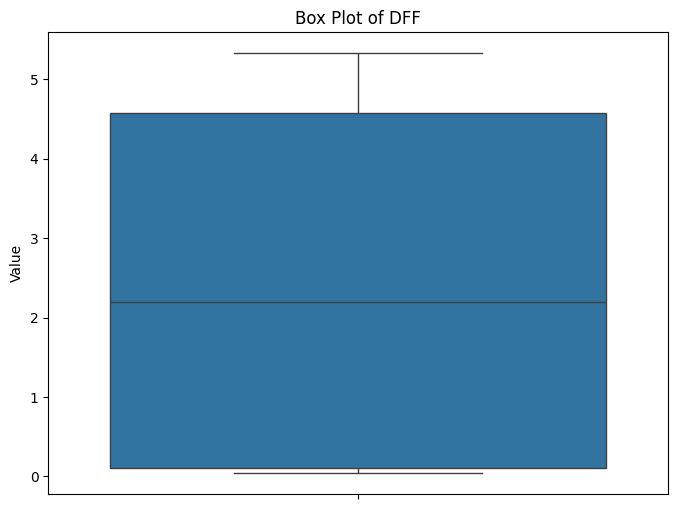

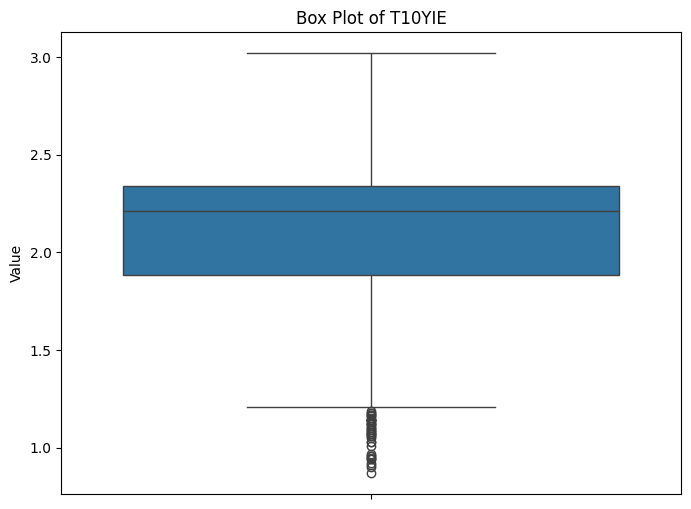

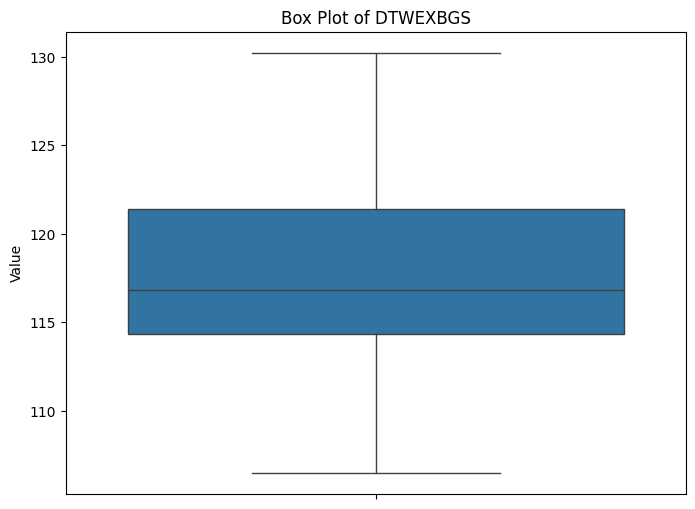

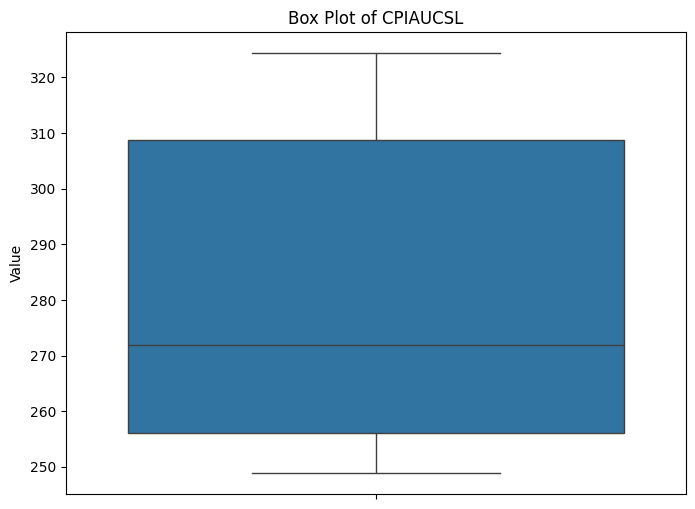

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')
    plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns

outliers_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)

    outliers_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers_count
    }
    print(f"Column '{col}': {outliers_count} outliers detected (below {lower_bound:.2f} or above {upper_bound:.2f})")

# Optional: Display a more detailed summary for a specific column if needed
# print("\nDetailed summary for 'goc_long_benchmark':")
# print(outliers_summary['goc_long_benchmark'])

Column 'goc_long_benchmark': 0 outliers detected (below -0.49 or above 5.51)
Column 'goc_long_benchmark1': 0 outliers detected (below -1.59 or above 3.32)
Column 'goc_2y_benchmark': 0 outliers detected (below -2.14 or above 6.41)
Column 'goc_3y_benchmark': 0 outliers detected (below -1.83 or above 6.16)
Column 'goc_5y_benchmark': 0 outliers detected (below -1.24 or above 5.56)
Column 'goc_7y_benchmark': 0 outliers detected (below -1.32 or above 5.71)
Column 'goc_10y_benchmark': 0 outliers detected (below -1.11 or above 5.77)
Column 'goc_avg_over10y': 0 outliers detected (below -0.64 or above 5.63)
Column 'spread_10y_2y': 8 outliers detected (below -1.16 or above 1.43)
Column 'spread_10y_5y': 0 outliers detected (below -0.41 or above 0.63)
Column 'V39079': 0 outliers detected (below -5.75 or above 10.25)
Column 'AVGINTWO': 0 outliers detected (below -5.75 or above 10.25)
Column 'TBCDN30DMID': 0 outliers detected (below -5.37 or above 9.48)
Column 'TBCDN90DMID': 0 outliers detected (belo

## Summary of Initial Data Cleaning and Exploratory Analysis

Based on the initial data cleaning and exploratory analysis, the following key findings have been observed:

1.  **Duplicate Rows**: There are **0** duplicate rows in the dataset, indicating that all entries are unique.

2.  **Column Data Types**: The dataset consists of **26 columns**. The data types are primarily numerical (`float64`, 25 columns), with one `object` type column (`date`). The `date` column will need to be converted to a datetime object for time-series analysis.

3.  **Unique Values in Categorical Columns**: The only identified `object` type column is `'date'`, which has **1818** unique values, corresponding to the number of rows in the dataset. This confirms its role as a unique identifier for each observation.

4.  **Missing Values**: There are **no missing values** across any of the columns in the dataset, which simplifies the cleaning process as no imputation or removal of rows/columns due to missing data is required.

5.  **Outlier Detection (Box Plots & IQR Boundaries)**:
    *   The visual inspection of box plots showed potential outliers in several numerical columns, which was quantitatively confirmed by the IQR method.
    *   Columns with identified outliers include:
        *   `spread_10y_2y`: 8 outliers
        *   `FXEURCAD`: 20 outliers
        *   `USDCAD_ret`: 10 outliers
        *   `T10YIE`: 42 outliers
    *   Most other numerical columns did not show outliers based on the 1.5*IQR rule, suggesting a relatively clean distribution for those features. The presence of outliers in these specific columns may warrant further investigation or specific handling (e.g., capping, transformation) depending on the subsequent analysis goals. However, for the current task, no actions were taken to treat these outliers.

## Summary:

### Data Analysis Key Findings

*   **Duplicate Rows**: The dataset contains 0 duplicate rows, indicating all entries are unique.
*   **Column Data Types**: The DataFrame consists of 26 columns; 25 are numerical (`float64`), and one (`date`) is an `object` type.
*   **Unique Values**: The `date` column has 1818 unique values, matching the number of rows, confirming it acts as a unique identifier.
*   **Missing Values**: There are no missing values (0.0%) across any column in the dataset, simplifying the data cleaning process as no imputation or removal is required.
*   **Outlier Detection (IQR Method)**:
    *   `spread_10y_2y`: 8 outliers detected.
    *   `FXEURCAD`: 20 outliers detected.
    *   `USDCAD_ret`: 10 outliers detected.
    *   `T10YIE`: 42 outliers detected.
    *   Most other numerical columns did not show outliers based on the 1.5*IQR rule.

### Insights or Next Steps

*   The `date` column, currently an `object` type, should be converted to a datetime object to facilitate time-series analysis.
*   The detected outliers in columns such as `spread_10y_2y`, `FXEURCAD`, `USDCAD_ret`, and `T10YIE` warrant further investigation or specific handling (e.g., capping, transformation) depending on the subsequent analysis goals.


In [ ]:
# Load the dataset
df_index = pd.read_csv('/content/text_information_indices_2.csv')

df_index.info()
# Display the first 5 rows
df_index.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   date                                            2801 non-null   object 
 1   macro_economy_text_information                  2801 non-null   float64
 2   woodgreen_housing_demand_text_information       2801 non-null   float64
 3   woodgreen_cost_of_living_text_information       2801 non-null   float64
 4   woodgreen_employment_text_information           2801 non-null   float64
 5   woodgreen_mental_health_text_information        2801 non-null   float64
 6   woodgreen_food_security_text_information        2801 non-null   float64
 7   woodgreen_newcomer_settlement_text_information  2801 non-null   float64
 8   woodgreen_seniors_care_text_information         2801 non-null   float64
 9   woodgreen_family_violence_text_informatio

,date,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2018-01-01,1.337019,1.076304,0.810537,-0.525190,0.955983,-0.285260,1.178624,0.110629,0.960884
1,2018-01-02,1.309040,1.065588,0.807598,-0.525701,0.950667,-0.280634,1.149979,0.091417,0.954682
2,2018-01-03,1.281062,1.054872,0.804659,-0.526211,0.945352,-0.276008,1.121335,0.072204,0.948479
3,2018-01-04,1.253083,1.044157,0.801720,-0.526722,0.940037,-0.271382,1.092690,0.052991,0.942277
4,2018-01-05,1.225104,1.033441,0.798781,-0.527233,0.934721,-0.266756,1.064045,0.033779,0.936075


In [ ]:
categorical_cols = df_index.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column '{col}': {df_index[col].nunique()} unique values")

Column 'date': 2801 unique values


In [ ]:
duplicate_rows = df_index.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
missing_percentage = (df_index.isnull().sum() / len(df)) * 100
print("Percentage of missing values per column:")
print(missing_percentage)

Percentage of missing values per column:
date                                              0.0
macro_economy_text_information                    0.0
woodgreen_housing_demand_text_information         0.0
woodgreen_cost_of_living_text_information         0.0
woodgreen_employment_text_information             0.0
woodgreen_mental_health_text_information          0.0
woodgreen_food_security_text_information          0.0
woodgreen_newcomer_settlement_text_information    0.0
woodgreen_seniors_care_text_information           0.0
woodgreen_family_violence_text_information        0.0
dtype: float64


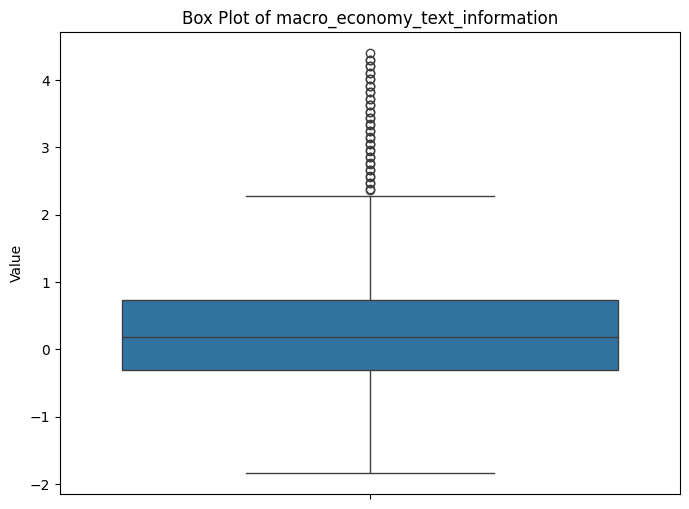

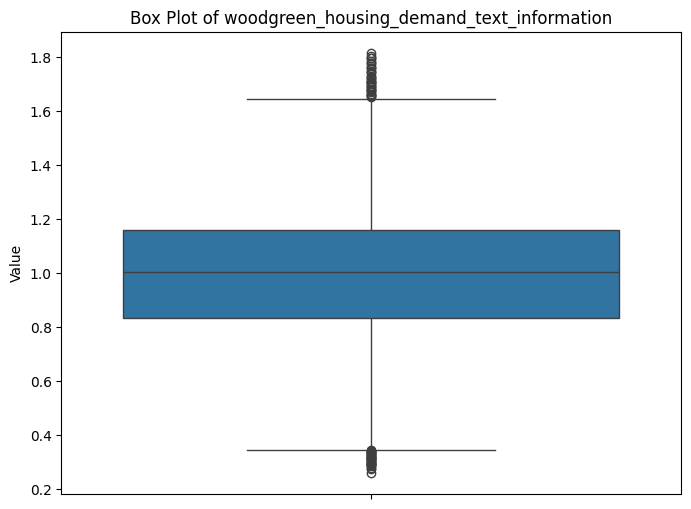

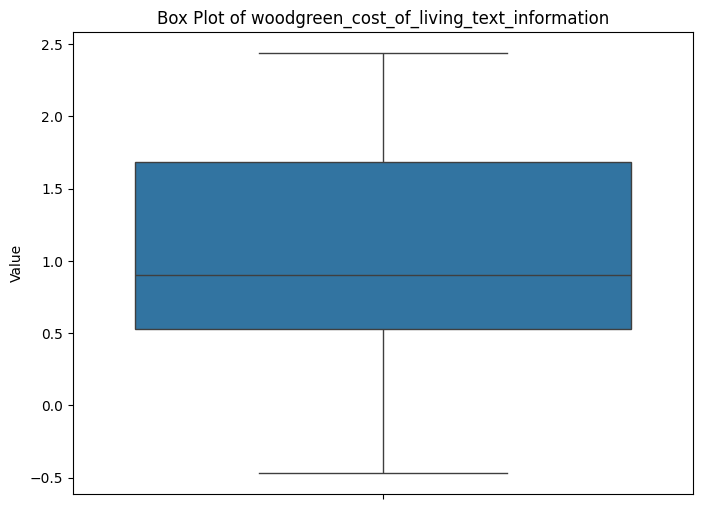

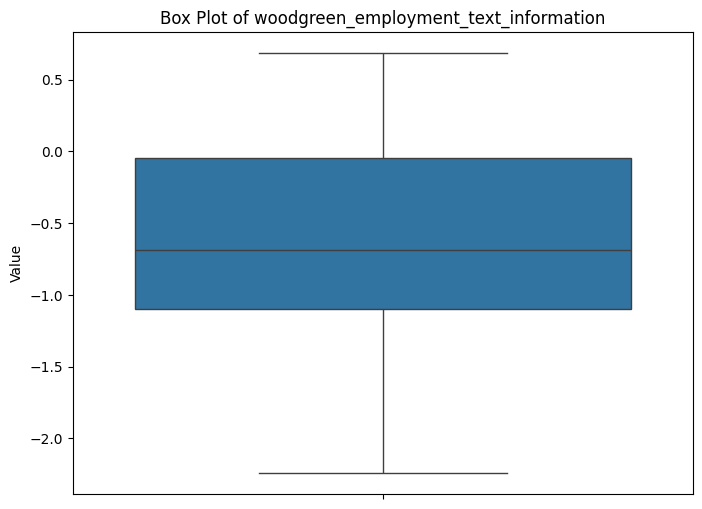

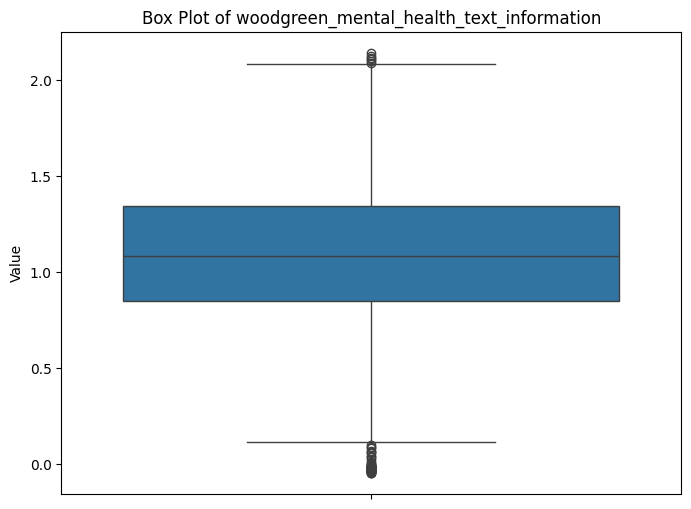

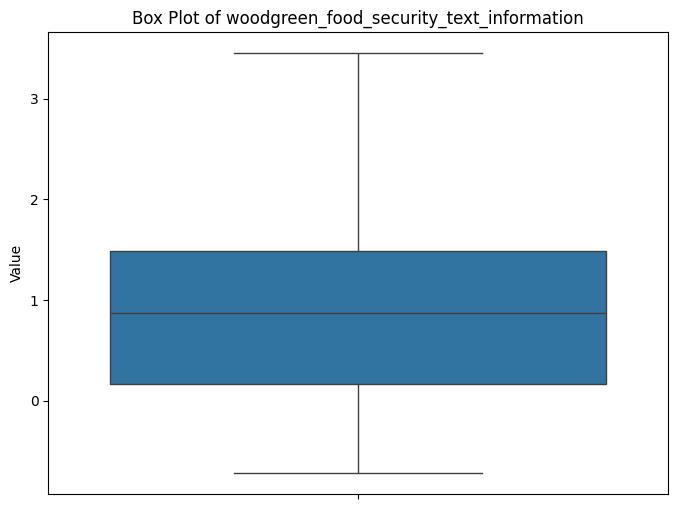

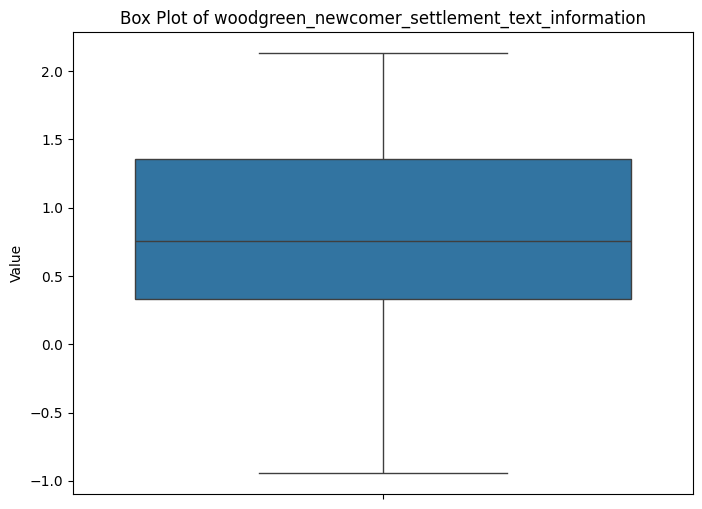

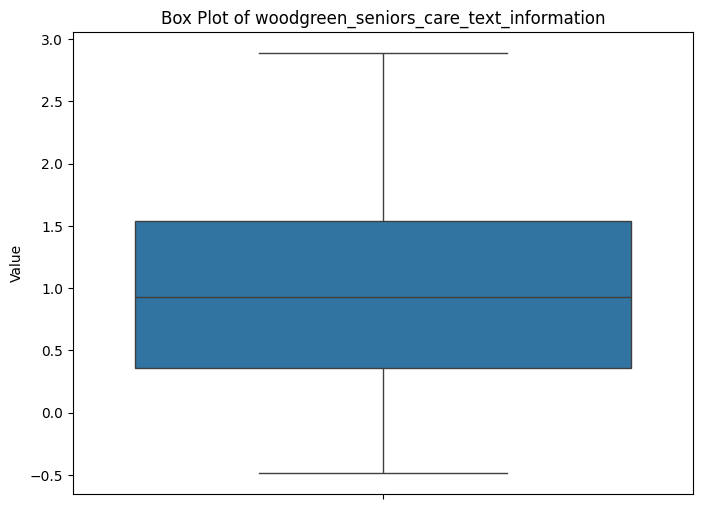

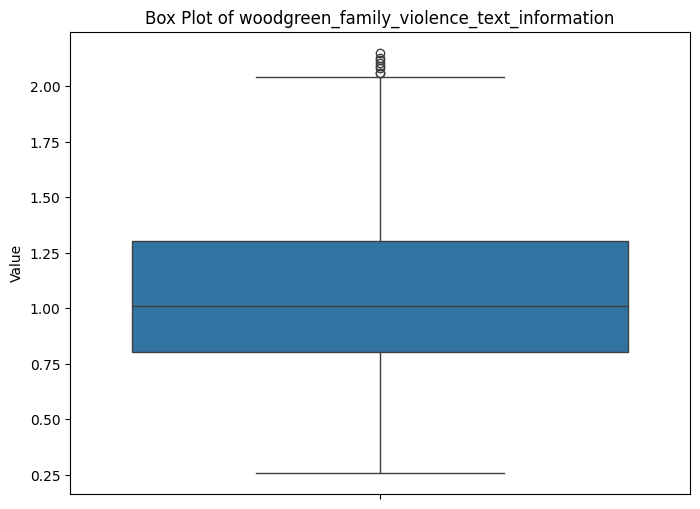

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_index.select_dtypes(include=['number']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_index[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')
    plt.show()

In [ ]:
numerical_cols = df_index.select_dtypes(include=['number']).columns

outliers_summary = {}

for col in numerical_cols:
    Q1 = df_index[col].quantile(0.25)
    Q3 = df_index[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_index[(df_index[col] < lower_bound) | (df_index[col] > upper_bound)]
    outliers_count = len(outliers)

    outliers_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers_count
    }
    print(f"Column '{col}': {outliers_count} outliers detected (below {lower_bound:.2f} or above {upper_bound:.2f})")

# Optional: Display a more detailed summary for a specific column if needed
# print("\nDetailed summary for 'goc_long_benchmark':")
# print(outliers_summary['goc_long_benchmark'])

Column 'macro_economy_text_information': 43 outliers detected (below -1.88 or above 2.30)
Column 'woodgreen_housing_demand_text_information': 66 outliers detected (below 0.35 or above 1.65)
Column 'woodgreen_cost_of_living_text_information': 0 outliers detected (below -1.21 or above 3.42)
Column 'woodgreen_employment_text_information': 0 outliers detected (below -2.69 or above 1.54)
Column 'woodgreen_mental_health_text_information': 49 outliers detected (below 0.10 or above 2.09)
Column 'woodgreen_food_security_text_information': 0 outliers detected (below -1.81 or above 3.46)
Column 'woodgreen_newcomer_settlement_text_information': 0 outliers detected (below -1.20 or above 2.89)
Column 'woodgreen_seniors_care_text_information': 0 outliers detected (below -1.41 or above 3.31)
Column 'woodgreen_family_violence_text_information': 8 outliers detected (below 0.06 or above 2.06)


## Summary (df_index):

### Data Analysis Key Findings for `df_index`

*   **Duplicate Rows**: The `df_index` dataset contains 0 duplicate rows, indicating all entries are unique.
*   **Column Data Types**: The `df_index` DataFrame consists of 10 columns; 9 are numerical (`float64`), and one (`date`) is an `object` type.
*   **Unique Values**: The `date` column has 2801 unique values, matching the number of rows, confirming it acts as a unique identifier.
*   **Missing Values**: There are no missing values (0.0%) across any column in the `df_index` dataset, simplifying the data cleaning process.
*   **Outlier Detection (IQR Method)**:
    *   `macro_economy_text_information`: 43 outliers detected.
    *   `woodgreen_housing_demand_text_information`: 66 outliers detected.
    *   `woodgreen_mental_health_text_information`: 49 outliers detected.
    *   `woodgreen_family_violence_text_information`: 8 outliers detected.
    *   Most other numerical columns did not show outliers based on the 1.5*IQR rule.

### Insights or Next Steps for `df_index`

*   The `date` column, currently an `object` type, should be converted to a datetime object to facilitate time-series analysis.
*   The detected outliers in columns such as `macro_economy_text_information`, `woodgreen_housing_demand_text_information`, `woodgreen_mental_health_text_information`, and `woodgreen_family_violence_text_information` may require further investigation or specific handling (e.g., capping, transformation) depending on the subsequent analysis goals.

In [ ]:
df_cleaned = df.copy()
removed_outliers_df = {}
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

initial_rows = len(df_cleaned)

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers_count = len(outliers)

    # Store count of removed outliers
    removed_outliers_df[col] = outliers_count

    # Filter out outliers
    df_cleaned = df_cleaned[~((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound))]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after outlier removal: {len(df_cleaned)}")
print("\nNumber of outliers removed per column:")
print(removed_outliers_df)


Initial number of rows: 1818
Number of rows after outlier removal: 1739

Number of outliers removed per column:
{'goc_long_benchmark': 0, 'goc_long_benchmark1': 0, 'goc_2y_benchmark': 0, 'goc_3y_benchmark': 0, 'goc_5y_benchmark': 0, 'goc_7y_benchmark': 0, 'goc_10y_benchmark': 0, 'goc_avg_over10y': 0, 'spread_10y_2y': 8, 'spread_10y_5y': 0, 'V39079': 0, 'AVGINTWO': 0, 'TBCDN30DMID': 0, 'TBCDN90DMID': 0, 'TBCDN180DMID': 0, 'TBCDN1YMID': 0, 'FXUSDCAD': 0, 'FXEURCAD': 21, 'EURUSD': 0, 'USDCAD_ret': 14, 'DGS10': 0, 'DFF': 0, 'T10YIE': 36, 'DTWEXBGS': 0, 'CPIAUCSL': 0}


In [ ]:
df_index_cleaned = df_index.copy()
removed_outliers_df_index = {}
numerical_cols_index = df_index_cleaned.select_dtypes(include=['number']).columns

initial_rows_index = len(df_index_cleaned)

for col in numerical_cols_index:
    Q1 = df_index_cleaned[col].quantile(0.25)
    Q3 = df_index_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_index_cleaned[(df_index_cleaned[col] < lower_bound) | (df_index_cleaned[col] > upper_bound)]
    outliers_count = len(outliers)

    # Store count of removed outliers
    removed_outliers_df_index[col] = outliers_count

    # Filter out outliers
    df_index_cleaned = df_index_cleaned[~((df_index_cleaned[col] < lower_bound) | (df_index_cleaned[col] > upper_bound))]

print(f"Initial number of rows in df_index: {initial_rows_index}")
print(f"Number of rows in df_index after outlier removal: {len(df_index_cleaned)}")
print("\nNumber of outliers removed per column from df_index:")
print(removed_outliers_df_index)

Initial number of rows in df_index: 2801
Number of rows in df_index after outlier removal: 2647

Number of outliers removed per column from df_index:
{'macro_economy_text_information': 43, 'woodgreen_housing_demand_text_information': 70, 'woodgreen_cost_of_living_text_information': 0, 'woodgreen_employment_text_information': 0, 'woodgreen_mental_health_text_information': 28, 'woodgreen_food_security_text_information': 0, 'woodgreen_newcomer_settlement_text_information': 0, 'woodgreen_seniors_care_text_information': 0, 'woodgreen_family_violence_text_information': 13}


In [ ]:
import pandas as pd

# === 1. Load or reuse cleaned daily data ===
# If df and df_index are already cleaned daily DataFrames, reuse them.
# Otherwise, load your cleaned daily CSVs here.

df_macro = df.copy()
df_index2 = df_index.copy()

# === 2. Parse dates consistently ===
df_macro['date'] = pd.to_datetime(df_macro['date'], format='mixed')
df_index2['date'] = pd.to_datetime(df_index2['date'], format='mixed')

# Set index and sort
df_macro = df_macro.set_index('date').sort_index()
df_index2 = df_index2.set_index('date').sort_index()

# === 3. Keep only meaningful numeric features ===
# (this automatically drops any non-numeric columns like text, IDs, etc.)
macro_numeric_cols = df_macro.select_dtypes(include='number').columns
index_numeric_cols = df_index2.select_dtypes(include='number').columns

df_macro = df_macro[macro_numeric_cols]
df_index2 = df_index2[index_numeric_cols]

# === 4. Resample both to the same weekly frequency ===
# IMPORTANT: use the SAME weekly rule as your intake data (e.g. 'W-SUN' or 'W-MON')
WEEKLY_RULE = 'W-SUN'  # or whatever you used when building program_intake_weekly

df_macro_weekly = df_macro.resample(WEEKLY_RULE).mean()
df_index_weekly = df_index2.resample(WEEKLY_RULE).mean()

# === 5. Align ranges with the weekly intake dataset ===
intake = pd.read_csv('total_intake_weekly.csv', parse_dates=['week_end'])
intake = intake.set_index('week_end').sort_index()

# Use intake's index as the canonical timeline
target_index = intake.index

# Restrict macro/index to that range, then reindex to match exactly
df_macro_weekly = df_macro_weekly.loc[target_index.min():target_index.max()]
df_index_weekly = df_index_weekly.loc[target_index.min():target_index.max()]

df_macro_weekly = df_macro_weekly.reindex(target_index)
df_index_weekly = df_index_weekly.reindex(target_index)

# Optionally: fill forward for macro/index gaps (if you want no missing features)
df_macro_weekly = df_macro_weekly.ffill()
df_index_weekly = df_index_weekly.ffill()

# === 6. Final: save aligned weekly feature sets ===
df_macro_weekly.to_csv('df_macro_weekly.csv')
df_index_weekly.to_csv('df_index_weekly.csv')

print("df_macro_weekly:", df_macro_weekly.shape, df_macro_weekly.index.min(), "→", df_macro_weekly.index.max())
print("df_index_weekly:", df_index_weekly.shape, df_index_weekly.index.min(), "→", df_index_weekly.index.max())


df_macro_weekly: (242, 25) 2021-03-07 00:00:00 → 2025-10-19 00:00:00
df_index_weekly: (242, 9) 2021-03-07 00:00:00 → 2025-10-19 00:00:00


In [ ]:
df = pd.read_csv('/content/df_index_weekly.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   week_end                                        242 non-null    object 
 1   macro_economy_text_information                  242 non-null    float64
 2   woodgreen_housing_demand_text_information       242 non-null    float64
 3   woodgreen_cost_of_living_text_information       242 non-null    float64
 4   woodgreen_employment_text_information           242 non-null    float64
 5   woodgreen_mental_health_text_information        242 non-null    float64
 6   woodgreen_food_security_text_information        242 non-null    float64
 7   woodgreen_newcomer_settlement_text_information  242 non-null    float64
 8   woodgreen_seniors_care_text_information         242 non-null    float64
 9   woodgreen_family_violence_text_information 

In [ ]:
import pandas as pd

# Process total_intake_weekly.csv
total_df = pd.read_csv('/content/df_index_weekly.csv')
total_df['week_end'] = pd.to_datetime(total_df['week_end'])

# Convert all other columns to float64
for col in total_df.columns:
    if col != 'week_end':
        total_df[col] = total_df[col].astype(float)

print('Info for df_index_weekly.csv after type conversion:')
total_df.info()
print('\nHead for df_index_weekly.csv after type conversion:')
display(total_df.head())

Info for df_index_weekly.csv after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   week_end                                        242 non-null    datetime64[ns]
 1   macro_economy_text_information                  242 non-null    float64       
 2   woodgreen_housing_demand_text_information       242 non-null    float64       
 3   woodgreen_cost_of_living_text_information       242 non-null    float64       
 4   woodgreen_employment_text_information           242 non-null    float64       
 5   woodgreen_mental_health_text_information        242 non-null    float64       
 6   woodgreen_food_security_text_information        242 non-null    float64       
 7   woodgreen_newcomer_settlement_text_information  242 non-null    float64       
 8 

,week_end,macro_economy_text_information,woodgreen_housing_demand_text_information,woodgreen_cost_of_living_text_information,woodgreen_employment_text_information,woodgreen_mental_health_text_information,woodgreen_food_security_text_information,woodgreen_newcomer_settlement_text_information,woodgreen_seniors_care_text_information,woodgreen_family_violence_text_information
0,2021-03-07,-0.542208,0.621375,0.136496,-1.221134,1.028172,0.091205,0.540295,0.461096,1.860368
1,2021-03-14,-0.454451,0.609887,0.126942,-1.323509,1.050778,-0.023830,0.479005,0.398797,1.704761
2,2021-03-21,-0.366695,0.598398,0.117389,-1.425885,1.073384,-0.138866,0.417715,0.336499,1.549153
3,2021-03-28,-0.278938,0.586910,0.107835,-1.528261,1.095989,-0.253901,0.356426,0.274200,1.393546
4,2021-04-04,-0.223556,0.570998,0.097724,-1.619435,1.129172,-0.336463,0.304243,0.215908,1.264500


In [ ]:
# Process program_intake_weekly.csv
program_df = pd.read_csv('/content/df_macro_weekly.csv')
program_df['week_end'] = pd.to_datetime(program_df['week_end'])

# Convert all other columns to float64
for col in program_df.columns:
    if col != 'week_end':
        program_df[col] = program_df[col].astype(float)

print('Info for df_macro_weekly.csv after type conversion:')
program_df.info()
print('\nHead for df_macro_weekly.csv after type conversion:')
display(program_df.head())

Info for df_macro_weekly.csv after type conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   week_end             242 non-null    datetime64[ns]
 1   goc_long_benchmark   242 non-null    float64       
 2   goc_long_benchmark1  242 non-null    float64       
 3   goc_2y_benchmark     242 non-null    float64       
 4   goc_3y_benchmark     242 non-null    float64       
 5   goc_5y_benchmark     242 non-null    float64       
 6   goc_7y_benchmark     242 non-null    float64       
 7   goc_10y_benchmark    242 non-null    float64       
 8   goc_avg_over10y      242 non-null    float64       
 9   spread_10y_2y        242 non-null    float64       
 10  spread_10y_5y        242 non-null    float64       
 11  V39079               242 non-null    float64       
 12  AVGINTWO             242 non-null    flo

,week_end,goc_long_benchmark,goc_long_benchmark1,goc_2y_benchmark,goc_3y_benchmark,goc_5y_benchmark,goc_7y_benchmark,goc_10y_benchmark,goc_avg_over10y,spread_10y_2y,...,TBCDN1YMID,FXUSDCAD,FXEURCAD,EURUSD,USDCAD_ret,DGS10,DFF,T10YIE,DTWEXBGS,CPIAUCSL
0,2021-03-07,1.830,0.166,0.264,0.392,0.844,1.088,1.414,1.750,1.150,...,0.174,1.26446,1.52008,1.202163,-0.000266,1.488,0.070,2.198,112.86818,264.8470
1,2021-03-14,1.898,0.190,0.272,0.494,0.930,1.206,1.480,1.822,1.208,...,0.192,1.25972,1.50092,1.191486,-0.002775,1.570,0.070,2.244,113.56036,264.8470
2,2021-03-21,2.048,0.292,0.284,0.534,1.010,1.280,1.576,1.962,1.292,...,0.172,1.24728,1.48610,1.191473,0.000210,1.664,0.070,2.290,113.03020,264.8470
3,2021-03-28,1.950,0.190,0.242,0.486,0.938,1.196,1.492,1.876,1.250,...,0.150,1.25646,1.48766,1.184021,0.001183,1.648,0.070,2.318,113.55108,264.8470
4,2021-04-04,1.962,0.220,0.224,0.484,0.974,1.232,1.526,1.892,1.302,...,0.148,1.25860,1.47918,1.175260,-0.000395,1.722,0.068,2.358,113.89766,265.5582


In [ ]:
total_df.to_csv('df_index_weekly.csv', index=False)
print('Saved df_index_weekly.csv')

program_df.to_csv('df_macro_weekly.csv', index=False)
print('Saved df_macro_weekly.csv')

Saved df_index_weekly.csv
Saved df_macro_weekly.csv
